# Assignment 9: Dimensionality Reduction
- What is **Dimensionality Reduction**?
    - A method for representing a given dataset using a lower number of features (i.e. dimensions) while still capturing the original data’s meaningful properties.
    - Dimensionality Reduction methods are Principal Component Analysis (PCA), Singular Value Decomposition
(SVD), and Linear Discriminant Analysis (LDA).<br><br>

- What is **Principal Component Analysis (PCA)**? 
    - A dimensionality reduction and machine learning ***method*** used to simplify a large data set into a smaller set.
    - It is commonly used for data preprocessing for use with machine learning algorithms
    - An unsupervised machine learning techniques used for data analysis.<br><br>

- Sources:
    - [What is dimensionality reduction?](https://www.ibm.com/topics/dimensionality-reduction)
    - [Principal Component Analysis (PCA): A Step-by-Step Explanation](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
    - [What is Principal Component Analysis (PCA)?](https://www.ibm.com/topics/principal-component-analysis)

## Setup
- [Using PCA in SKLearn](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html) 

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Import Dataset
This iris dataset is from `sklearn.datasets`.
The dataset contains 150 samples, each with four features:

- Sepal length: The length of the sepal, measured in centimeters.
- Sepal width: The width of the sepal, measured in centimeters.
- Petal length: The length of the petal, measured in centimeters.
- Petal width: The width of the petal, measured in centimeters.
  
Each sample is classified into one of three species of Iris flower:

- Iris Setosa
- Iris Versicolor
- Iris Virginica

In [3]:
data = load_iris(as_frame=True)
data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
print(data['DESCR']) #reading the description of the dataset in the DESCR variable/attribute

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Scale Dataset

- `StandardScaler()` standardizes the dataset
- `fit_transform()` fit and transform the dataset

In [5]:
iris = StandardScaler().fit_transform(data.data)

## Covariance Matrix
**Covariance** measures how two variables move together. It gives insight into whether the variables have a positive, negative, or no relationship:
- Positive Covariance: When one variable increases, the other variable also increases.
- Negative Covariance: When one variable increases, the other variable decreases.
- Zero Covariance: The two variables are unrelated; one change doesn’t tell us anything about the other.

To capture the relationships and variances between the different features (dimensions) of the data, finding the **covariance matrix** is necessary.

Readings:
[Covariance and Correlation in Machine Learning: Practical Applications and Insights](https://medium.com/@ryassminh/covariance-and-correlation-in-machine-learning-practical-applications-and-insights-1dbe8cee1e1a#Covariance-In-ML-models)


<Axes: >

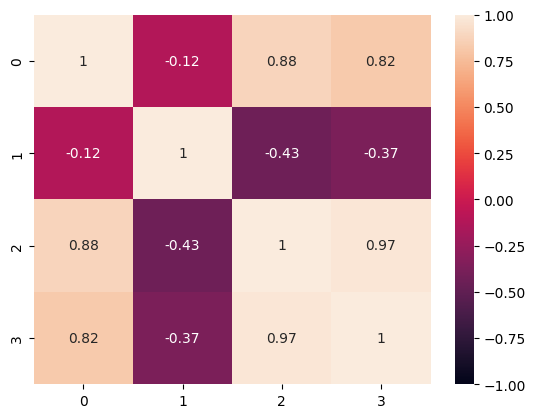

In [6]:
# Calculate covariance matrix manually and display
mean_vec = np.mean(iris, axis=0)
cm = (iris - mean_vec).T.dot((iris - mean_vec)) / (iris.shape[0] - 1)
sns.heatmap(cm, vmin=-1.0, vmax=1.0, annot=True)

Interpretation: 
- The heatmap of Covariance Matrix displays the relationships and direction between different features of the dataset from -1 to 1. 
- The lighter the color, the more positive and stronger the relationship between features. 
- For example, the relationship between 0 and 2 is more positive and stronger the relationship between 0 and 3. 
- Notices there are `1` values in the heatmap, these are the relationship between a feature and itself.
- Relationships has negative values indicates, when a feature moves, the other feature also moves away from it.

### Finding the Eigen Vectors and Corresponding Eigen Values
 The **eigenvectors** represent the directions of maximum variance (i.e., the principal components), while the **eigenvalues** represent the amount of variance explained by each principal component.

In [55]:
# Compute and sort eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cm)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Sorting EigenVectors According to their EigenValues in Decreasing Order
Since `np.linalg.eig` displays the results in their computing order, we will use `np.argsort()` to get the indices of `eigenvalues` and sort the results.<br>
`[:: -1]` reverses the order to make it descending

In [56]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Sorted Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Number of Dimensions, k
The first 𝑘 eigenvectors correspond to the 𝑘 largest eigenvalues, which represent the dimensions with the most variance in the data. Choosing 𝑘 allows us to reduce the dimensionality of the data while retaining the majority of its variance.

#### How to find and choose k?
Calculating the Explained Variance or Variance Accounted For helps to determine which number of k to choose. This calculated as the sum of their eigenvalues divided by the total sum of all eigenvalues. The results will be the proportion of the total variance that is retained when reducing to 𝑘 dimensions.

In [9]:
# Explained Variance Calculation
tot = sum(sorted_eigenvalues) # calculate the total with sum()
var_exp = [(i/tot)*100 for i in sorted(sorted_eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

### Guide to Choose k
The selection of `𝑘` is often guided by the following considerations choose `𝑘` so that the selected principal components capture a significant portion of the total variance, often 90%, 95%, or even 99%, depending on the application. The idea is to reduce dimensionality while retaining most of the information. If other word, the number of k where the Cumulative Variance is above 90%.

In [10]:
for i, (indiv, cum) in enumerate(zip(var_exp, cum_var_exp), 1):
    print(f"Component {i}: Individual Variance = {indiv:.2f}%, Cumulative Variance = {cum:.2f}%")

Component 1: Individual Variance = 72.96%, Cumulative Variance = 72.96%
Component 2: Individual Variance = 22.85%, Cumulative Variance = 95.81%
Component 3: Individual Variance = 3.67%, Cumulative Variance = 99.48%
Component 4: Individual Variance = 0.52%, Cumulative Variance = 100.00%


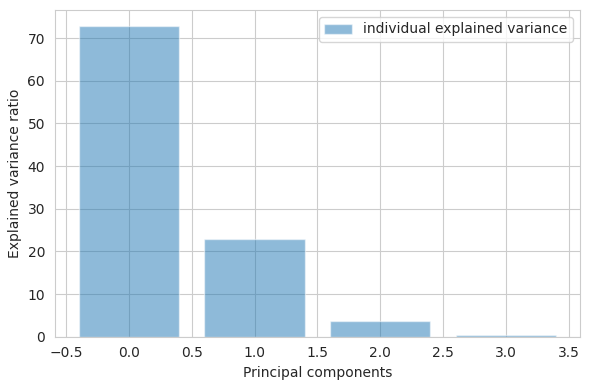

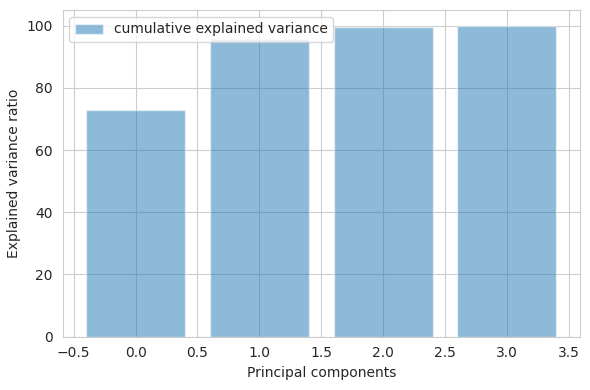

In [11]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual explained variance')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), cum_var_exp,  alpha=0.5, align='center', label='cumulative explained variance')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Interpretation: 
- Plot 1:
    - The 1st bar shows k is 1, the Explained Variance ratio is over 70%.
    - The 2nd bar shows k is 2, the Explained Variance ratio is over 20%.
    - The 3rd bar shows k is 3, the Explained Variance ratio is about 5%.
    - The last bar shows k is 4, the Explained Variance ratio is the rest.
- Plot 2:
    - The 1st bar shows k is 1, the Explained Variance ratio is over 70%.
    - The 2nd bar shows k is 2, the Explained Variance ratio is over 95%.
    - The 3rd bar shows k is 3, the Explained Variance ratio is about 99%.
    - The last bar shows k is 4, the Explained Variance ratio is 100%. 

Based on this, **k can be either 2 or 3**, as it provides a balance between reducing dimensionality and retaining most of the data’s variance. This choice effectively captures the main patterns in the data while reducing complexity.

- If minimal dimensionality is a priority, `𝑘 = 2` would provide a compact, efficient representation with relatively low information loss.
- If preserving almost all the variance is essential, `𝑘 = 3` would still reduce dimensions by one while keeping nearly all variance.

I choose both `𝑘 = 2` and `𝑘 = 3`

In [57]:
# Define values for k
k2, k3 = 2, 3 # I choose both k = 2 and k = 3

## PCA with skLearn
The PCA can be done by hard coding. However, if using **skLearn**, it'll be faster.
- Initialize the PCA
- Plotting 2D plot with k
- Plotting 3D plot with k

### Initialize the PCA with k = 2 components

In [ ]:
def PCA(k):
    pca = PCA(n_components=k).fit_transform(iris)
    kmean = KMeans(n_clusters=3, random_state=0) # since it's known there're 3 species of iris in the dataset so n_clusters=3
    labels = kmean.fit_predict(pca)
    return pca, kmean, labels

In [13]:
pca2 = PCA(n_components=k2)
X_reduced2 = pca2.fit_transform(iris)
kmeans2 = KMeans(n_clusters=3, random_state=0)
labels2 = kmeans2.fit_predict(X_reduced2)

#### Plot 2D

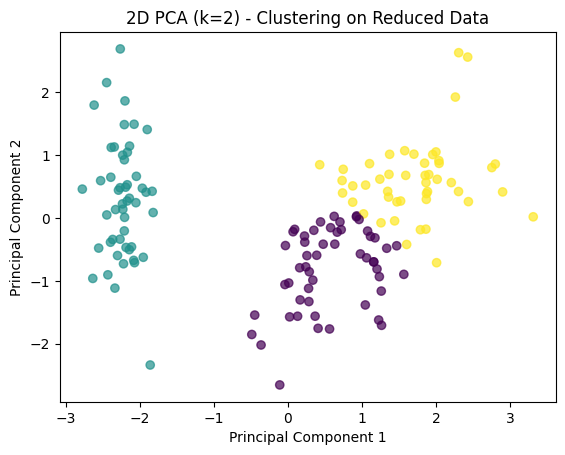

In [14]:
plt.figure()
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=labels2, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA (k=2) - Clustering on Reduced Data")
plt.show()

Interpretation: The plot suggests that the first two principal components are sufficient to distinguish between the three Iris species. The clustering algorithm has successfully identified these groups based on the reduced dimensionality data. This visualization provides a clear and concise overview of the dataset's structure and the effectiveness of the PCA and clustering techniques.

#### Plot 3D

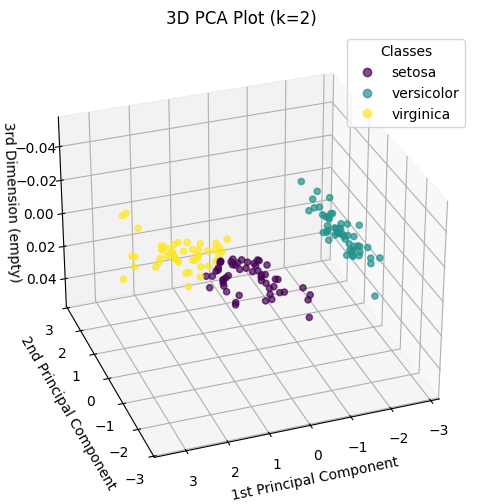

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
scatter = ax.scatter(
    X_reduced2[:, 0],
    X_reduced2[:, 1],
    np.zeros(X_reduced2.shape[0]),  # 3rd dimension is zero since k=2
    c=labels2,
    cmap='viridis',
    alpha=0.7
)
ax.set(
    title="3D PCA Plot (k=2)",
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
    zlabel="3rd Dimension (empty)"
)
legend1 = ax.legend(
    scatter.legend_elements()[0],
    data.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
plt.show()

Interpretation: The plot suggests that the first three principal components are sufficient to distinguish between the three Iris species. The clustering algorithm has successfully identified these groups based on the reduced dimensionality data. This visualization provides a more comprehensive overview of the dataset's structure and the effectiveness of the PCA technique compared to the 2D projection.

### Initialize the PCA with k = 3 components

In [20]:
pca3 = PCA(n_components=k3)
X_reduced3 = pca3.fit_transform(iris)
kmeans3 = KMeans(n_clusters=3, random_state=0)
labels3 = kmeans3.fit_predict(X_reduced3[:, :2])

#### Plot 2D

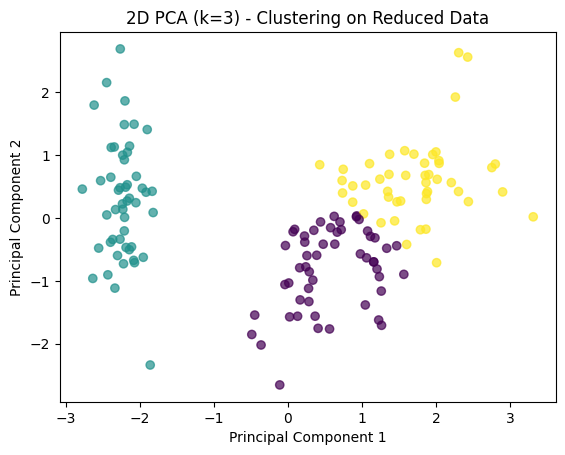

In [21]:
plt.figure()
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=labels3, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA (k=3) - Clustering on Reduced Data")
plt.show()

Interpretation: The plot suggests that the first two principal components are sufficient to distinguish between the three Iris species. The clustering algorithm has successfully identified these groups based on the reduced dimensionality data. This visualization provides a clear and concise overview of the dataset's structure and the effectiveness of the PCA and clustering techniques. There's no visible difference between this and the 2D PCA (k=2) plot. 

#### Plot 3D

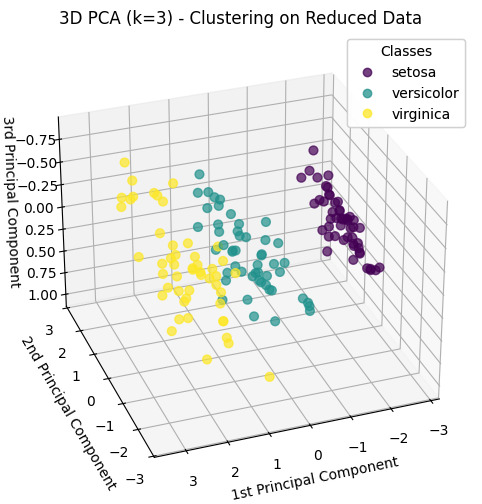

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
scatter = ax.scatter(
    X_reduced3[:, 0],
    X_reduced3[:, 1],
    X_reduced3[:, 2],
    c=data.target,
    cmap='viridis',
    s=40,
    alpha=0.7
)
ax.set(
    title="3D PCA (k=3) - Clustering on Reduced Data",
    xlabel="1st Principal Component",
    ylabel="2nd Principal Component",
    zlabel="3rd Principal Component"
)
legend1 = ax.legend(
    scatter.legend_elements()[0],
    data.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)
plt.show()

Interpretation: The plot suggests that the first three principal components are sufficient to distinguish between the three Iris species. The clustering algorithm has successfully identified these groups based on the reduced dimensionality data. This visualization provides a more comprehensive overview of the dataset's structure and the effectiveness of the PCA technique compared to the 2D projection.

## Comparing the Plots of k = 2 and k = 3

### 2D Plots
Creating a function for 2D plot that taking instant of PCA, number of k, and labels as parameters.

In [33]:
def Plot2D(pca, k, labels):
    plt.figure()
    plt.scatter(pca[:, 0], pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"2D PCA (k={k}) - Clustering on Reduced Data")
    plt.show()

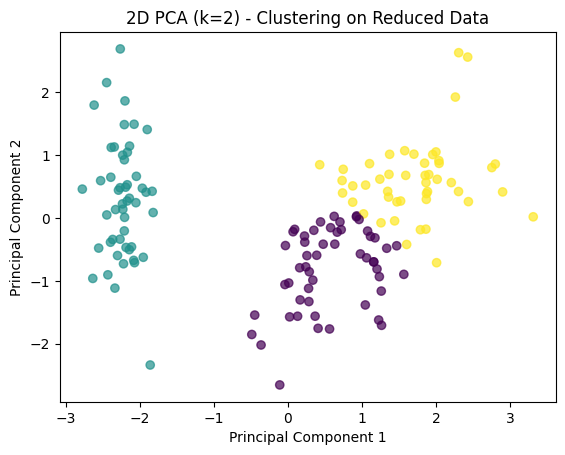

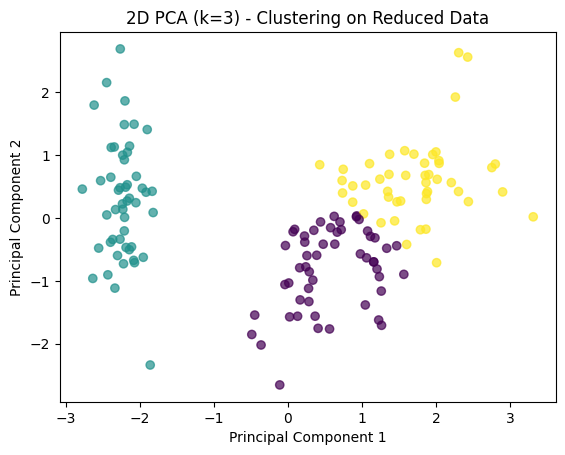

In [ ]:
Plot2D(X_reduced2, k2, labels2)
Plot2D(X_reduced3, k3, labels3)

Interpretation: In 2 dimensional plots, there's no visual difference between `k = 2` and `k = 3`.

### 3D Plots

In [50]:
def plot3D(pca, k):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
    
    if k == 2:
        scatter = ax.scatter(
        pca[:, 0],
        pca[:, 1],
        c=data.target,
        cmap='viridis',
        s=40,
        alpha=0.7
        )
        scatter = ax.scatter(
        pca[:, 0],
        pca[:, 1],
        c=data.target,
        cmap='viridis',
        s=40,
        alpha=0.7
        )
        ax.set(
            title=f"3D PCA (k={k}) - Clustering on Reduced Data",
            xlabel="1st Principal Component",
            ylabel="2nd Principal Component",
            zlabel="3rd Principal Component"
        )
        legend1 = ax.legend(
            scatter.legend_elements()[0],
            data.target_names.tolist(),
            loc="upper right",
            title="Classes",
        )
        ax.add_artist(legend1)
        plt.show()
    else:
        scatter = ax.scatter(
        pca[:, 0],
        pca[:, 1],
        pca[:, 2],
        c=data.target,
        cmap='viridis',
        s=40,
        alpha=0.7
        )

        scatter = ax.scatter(
            pca[:, 0],
            pca[:, 1],
            pca[:, 2],
            c=data.target,
            cmap='viridis',
            s=40,
            alpha=0.7
        )
        ax.set(
            title=f"3D PCA (k={k}) - Clustering on Reduced Data",
            xlabel="1st Principal Component",
            ylabel="2nd Principal Component",
            zlabel="3rd Principal Component"
        )
        legend1 = ax.legend(
            scatter.legend_elements()[0],
            data.target_names.tolist(),
            loc="upper right",
            title="Classes"
        )
        ax.add_artist(legend1)
        plt.show()

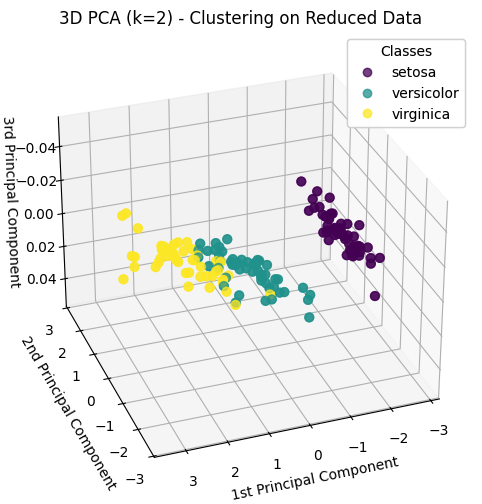

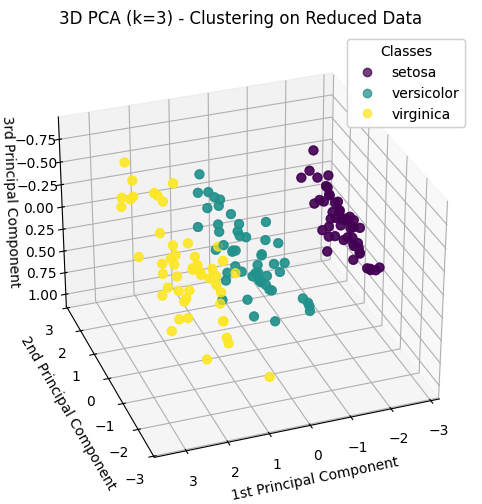

None None


In [ ]:
plot3D(X_reduced2, k2)
plot3D(X_reduced3, k3)

Interpretation: The 3D plot where k = 3 displays more data points then the plot where k = 2.